In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [2]:
stalite_image_folder="C:\\Projects\\AI\\data\\Dubai Semantic segmentation dataset"

In [3]:
for path,subdir,files in os.walk(stalite_image_folder):
    dir_name= path.split(os.path.sep)[-1]
    print(dir_name)
    if dir_name=="images":
        images=os.listdir(path)
        print(images)

Dubai Semantic segmentation dataset
Tile 1
images
['image_part_001.jpg', 'image_part_002.jpg', 'image_part_003.jpg', 'image_part_004.jpg', 'image_part_005.jpg', 'image_part_006.jpg', 'image_part_007.jpg', 'image_part_008.jpg', 'image_part_009.jpg']
masks
Tile 2
images
['image_part_001.jpg', 'image_part_002.jpg', 'image_part_003.jpg', 'image_part_004.jpg', 'image_part_005.jpg', 'image_part_006.jpg', 'image_part_007.jpg', 'image_part_008.jpg', 'image_part_009.jpg']
masks
Tile 3
images
['image_part_001.jpg', 'image_part_002.jpg', 'image_part_003.jpg', 'image_part_004.jpg', 'image_part_005.jpg', 'image_part_006.jpg', 'image_part_007.jpg', 'image_part_008.jpg', 'image_part_009.jpg']
masks
Tile 4
images
['image_part_001.jpg', 'image_part_002.jpg', 'image_part_003.jpg', 'image_part_004.jpg', 'image_part_005.jpg', 'image_part_006.jpg', 'image_part_007.jpg', 'image_part_008.jpg', 'image_part_009.jpg']
masks
Tile 5
images
['image_part_001.jpg', 'image_part_002.jpg', 'image_part_003.jpg', 'image_

In [4]:
"""image_patch_size=256
full_image=[]
full_mask=[]
scaler=MinMaxScaler
for a in range(1,8):
    for b in range(1,20):
        image=cv2.imread(f'{stalite_image_folder}/Tile {a}/images/image_part_00{b}.jpg')   
             
        if image is not None:
            size_x=(image.shape[1]//image_patch_size)*image_patch_size
            size_y=(image.shape[0]//image_patch_size)*image_patch_size
            image=image[:size_x,:size_y]
            patched_images=patchify(image,(image_patch_size,image_patch_size,3),step=image_patch_size)
            for i in range(patched_images.shape[0]):
                for j in range(patched_images.shape[1]):
                    patch = patched_images[i, j,:,:]
                    individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
                    patch_image=patch[0]
                    full_image.append(patch_image)


"""

"image_patch_size=256\nfull_image=[]\nfull_mask=[]\nscaler=MinMaxScaler\nfor a in range(1,8):\n    for b in range(1,20):\n        image=cv2.imread(f'{stalite_image_folder}/Tile {a}/images/image_part_00{b}.jpg')   \n             \n        if image is not None:\n            size_x=(image.shape[1]//image_patch_size)*image_patch_size\n            size_y=(image.shape[0]//image_patch_size)*image_patch_size\n            image=image[:size_x,:size_y]\n            patched_images=patchify(image,(image_patch_size,image_patch_size,3),step=image_patch_size)\n            for i in range(patched_images.shape[0]):\n                for j in range(patched_images.shape[1]):\n                    patch = patched_images[i, j,:,:]\n                    individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)\n                    patch_image=patch[0]\n                    full_image.append(patch_image)\n

In [5]:
len(full_image)

NameError: name 'full_image' is not defined

Image

In [6]:
image_patch_size=256
full_image=[]

minmaxscaler=MinMaxScaler()
for title_i in range(1,8):
    for title_j in range(1,20):
        image = cv2.imread(f'{stalite_image_folder}/Tile {title_i}/images/image_part_00{title_j}.jpg')   
             
        if image is not None:
            size_x = (image.shape[1] // image_patch_size) * image_patch_size
            size_y = (image.shape[0] // image_patch_size) * image_patch_size

            image = Image.fromarray(image)
            image = image.crop((0,0, size_x, size_y))
            image = np.array(image)

            patched_images=patchify(image,(image_patch_size,image_patch_size,3),step=image_patch_size)
            
            for i in range(patched_images.shape[0]):
                for j in range(patched_images.shape[1]):
                    individual_patched_image = patched_images[i,j, :, :]
                    individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
                    #individual_patched_image=individual_patched_image/255
                    individual_patched_image = individual_patched_image[0]
                    full_image.append(individual_patched_image)




Mask

In [7]:
full_mask=[]
mask_patch_size=256
for title_i in range(1,8):
    for title_j in range(1,20):
        mask = cv2.imread(f'{stalite_image_folder}/Tile {title_i}/masks/image_part_00{title_j}.png')
           
             
        if mask is not None:
            mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
            size_x = (mask.shape[1] // mask_patch_size) * mask_patch_size
            size_y = (mask.shape[0] // mask_patch_size) * mask_patch_size

            mask = Image.fromarray(mask)
            mask = mask.crop((0,0, size_x, size_y))
            mask = np.array(mask)

            patched_masks=patchify(mask,(mask_patch_size,mask_patch_size,3),step=mask_patch_size)
            
            for i in range(patched_masks.shape[0]):
                for j in range(patched_masks.shape[1]):
                    individual_patched_mask = patched_masks[i,j, :, :]
                    #individual_patched_mask = minmaxscaler.fit_transform(individual_patched_mask.reshape(-1, individual_patched_mask.shape[-1])).reshape(individual_patched_mask.shape)
                    #individual_patched_mask=individual_patched_mask/255
                    individual_patched_mask = individual_patched_mask[0]
                    full_mask.append(individual_patched_mask)


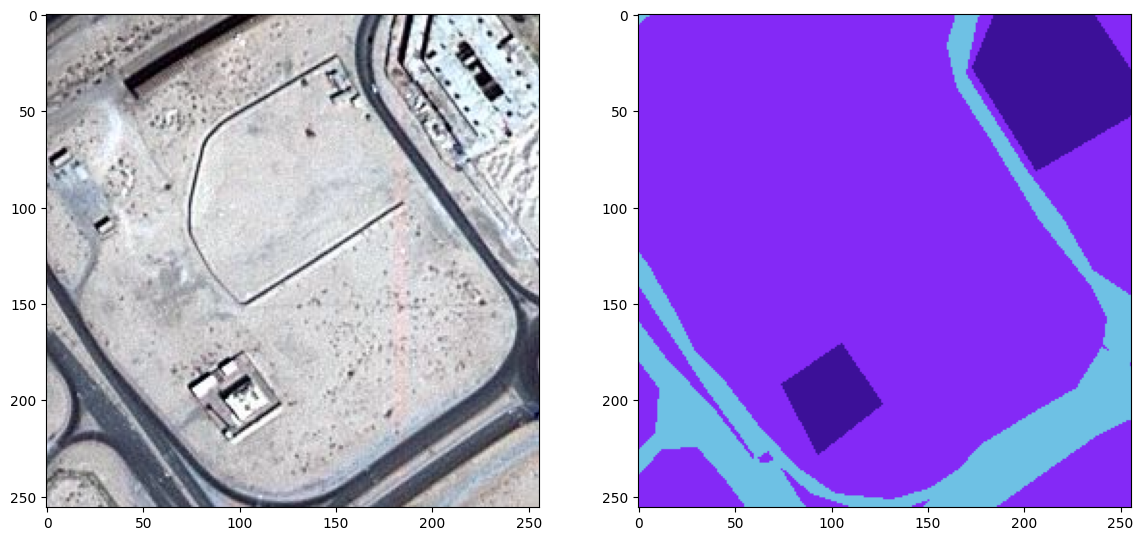

In [8]:
import random
random_image_id = random.randint(0, len(full_image))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(full_image[random_image_id])
plt.subplot(122)
plt.imshow(full_mask[random_image_id])

In [9]:
from colormap import hex2rgb
class_building = np.array(hex2rgb('#3C1098'))
print(class_building)
class_land = np.array(hex2rgb('#8429F6'))
print(class_land)
class_road = np.array(hex2rgb('#6EC1E4'))
print(class_road)
class_vegetation = np.array(hex2rgb('#FEDD3A'))
print(class_vegetation)
class_water = np.array(hex2rgb('#E2A929'))
print(class_water)
class_unlabeled = np.array(hex2rgb('#9B9B9B'))
print(class_unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [10]:
labels = full_mask

In [56]:
full_mask[0][0]

array([[132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41

In [24]:
np.shape(labels)

(945, 256, 256, 3)

In [32]:
len(labels)

945

In [60]:
len(full_mask[1])

256

In [68]:
full_mask[0]

array([[[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       ...,

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]]

In [77]:
labelss = []
for mask in full_mask:
    lable=np.zeros((256,256), dtype=np.uint8)

    for i in range(mask.shape[0]):
        for j in range (mask.shape[1]):

    
  
            if np.all(mask[i,j] == class_water):
                lable[i,j]=0
            elif np.all(mask[i,j] == class_land):
                lable[i,j]=1
            elif np.all(mask[i,j] == class_road):
                lable[i,j]=2
            elif np.all(mask[i,j] == class_building):
                lable[i,j]=3
            elif np.all(mask[i,j] == class_vegetation):
                lable[i,j]=4
            elif np.all(mask[i,j] == class_unlabeled):
                lable[i,j]=5
    labelss.append(lable)


In [78]:
labelss

[array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]], dtype=uint8),
 array([[1, 5, 5, ..., 0, 0, 0],
        [1, 5, 5, ..., 0, 0, 0],
        [1, 1, 5, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2]], dtype=uint8),
 array([[0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1]], dtype=uint8),
 array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]], dtype=uint8),
 array([[1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2

In [75]:
labelss = []
for mask in full_mask:
    lable = np.zeros((mask.shape[0], mask.shape[1]), dtype=np.uint8)

    # Define RGB values for classes
    class_colors = {
        tuple(class_water): 0,
        tuple(class_land): 1,
        tuple(class_road): 2,
        tuple(class_building): 3,
        tuple(class_vegetation): 4,
        tuple(class_unlabeled): 5
    }

    # Convert RGB mask to labeled mask using NumPy
    for class_name, label_value in class_colors.items():
        mask_indices = np.all(mask == class_name, axis=-1)
        lable[mask_indices] = label_value

    labelss.append(lable)


In [76]:
labelss

[array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]], dtype=uint8),
 array([[1, 5, 5, ..., 0, 0, 0],
        [1, 5, 5, ..., 0, 0, 0],
        [1, 1, 5, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2]], dtype=uint8),
 array([[0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1]], dtype=uint8),
 array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]], dtype=uint8),
 array([[1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2

In [70]:
labelss = []
for mask in full_mask:
    label = np.zeros((256, 256), dtype=np.uint8)

    for i in range(mask.shape[0]):  # Iterate over rows
        for j in range(mask.shape[1]):  # Iterate over columns

            if np.all(mask[i, j] == class_water):
                label[i, j] = 0
            elif np.all(mask[i, j] == class_land):
                label[i, j] = 1
            elif np.all(mask[i, j] == class_road):
                label[i, j] = 2
            elif np.all(mask[i, j] == class_building):
                label[i, j] = 3
            elif np.all(mask[i, j] == class_vegetation):
                label[i, j] = 4
            elif np.all(mask[i, j] == class_unlabeled):
                label[i, j] = 5
    labelss.append(label)


KeyboardInterrupt: 

In [38]:
len(labelss)

181

In [39]:
np.unique(labelss)

array([0, 1, 4])

In [31]:
np.uniqe(labelss)

AttributeError: module 'numpy' has no attribute 'uniqe'